In [5]:
import pandas as pd

df = pd.read_csv('../data/sierra_leone_clean.csv')  # adjust path if needed
df.head()

,Timestamp\tGHI\tDNI\tDHI\tModA\tModB\tTamb\tRH\tWS\tWSgust\tWSstdev\tWD\tWDstdev\tBP\tCleaning\tPrecipitation\tTModA\tTModB\tComments
0,10/30/2021 0:01\t-0.7\t-0.1\t-0.8\t0\t0\t21.9\...
1,10/30/2021 0:02\t-0.7\t-0.1\t-0.8\t0\t0\t21.9\...
2,10/30/2021 0:03\t-0.7\t-0.1\t-0.8\t0\t0\t21.9\...
3,10/30/2021 0:04\t-0.7\t0\t-0.8\t0\t0\t21.9\t99...
4,10/30/2021 0:05\t-0.7\t-0.1\t-0.8\t0\t0\t21.9\...


In [6]:
df.describe()
df.isna().sum()

Timestamp\tGHI\tDNI\tDHI\tModA\tModB\tTamb\tRH\tWS\tWSgust\tWSstdev\tWD\tWDstdev\tBP\tCleaning\tPrecipitation\tTModA\tTModB\tComments    0
dtype: int64

In [8]:
df.columns.tolist()

['Timestamp\tGHI\tDNI\tDHI\tModA\tModB\tTamb\tRH\tWS\tWSgust\tWSstdev\tWD\tWDstdev\tBP\tCleaning\tPrecipitation\tTModA\tTModB\tComments']

In [9]:
df = pd.read_csv('../data/sierra_leone_clean.csv', sep='\t')

In [10]:
df.columns.tolist()

['Timestamp',
 'GHI',
 'DNI',
 'DHI',
 'ModA',
 'ModB',
 'Tamb',
 'RH',
 'WS',
 'WSgust',
 'WSstdev',
 'WD',
 'WDstdev',
 'BP',
 'Cleaning',
 'Precipitation',
 'TModA',
 'TModB',
 'Comments']

In [11]:
df.describe()
df.isna().sum()

Timestamp            0
GHI                  0
DNI                  0
DHI                  0
ModA                 0
ModB                 0
Tamb                 0
RH                   0
WS                   0
WSgust               0
WSstdev              0
WD                   0
WDstdev              0
BP                   0
Cleaning             0
Precipitation        0
TModA                0
TModB                0
Comments         10000
dtype: int64

In [12]:
import numpy as np
from scipy import stats

columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = np.abs(stats.zscore(df[columns_to_check]))
outliers = (z_scores > 3).sum(axis=0)
outliers

array([  1,   0,  34,   1,   1, 109, 106])

In [13]:
df_clean = df.copy()
df_clean[columns_to_check] = df_clean[columns_to_check].apply(lambda x: x.fillna(x.median()))

# Optionally remove rows with extreme outliers
df_clean = df_clean[(z_scores < 3).all(axis=1)]

In [14]:
df_clean.to_csv('data/sierra_leone_clean.csv', index=False)

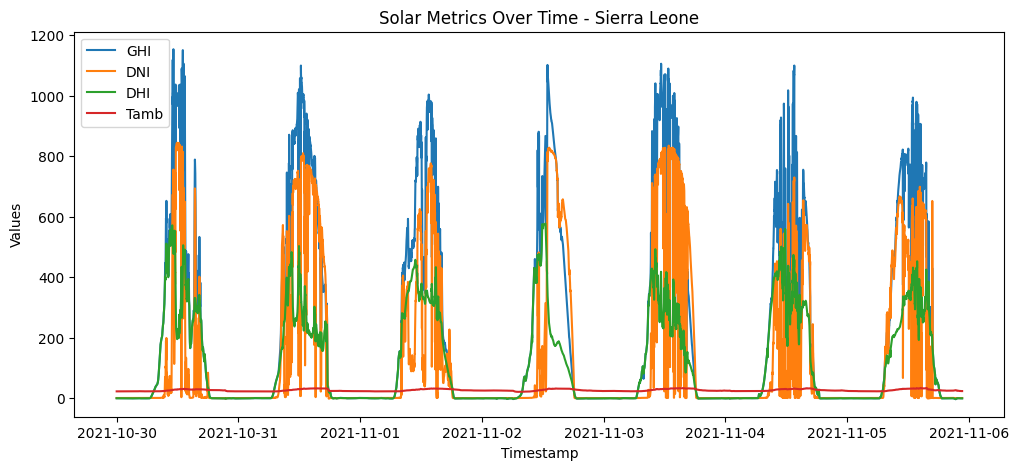

In [15]:
import matplotlib.pyplot as plt

df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])

plt.figure(figsize=(12, 5))
plt.plot(df_clean['Timestamp'], df_clean['GHI'], label='GHI')
plt.plot(df_clean['Timestamp'], df_clean['DNI'], label='DNI')
plt.plot(df_clean['Timestamp'], df_clean['DHI'], label='DHI')
plt.plot(df_clean['Timestamp'], df_clean['Tamb'], label='Tamb')
plt.legend()
plt.title('Solar Metrics Over Time - Sierra Leone')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.show()

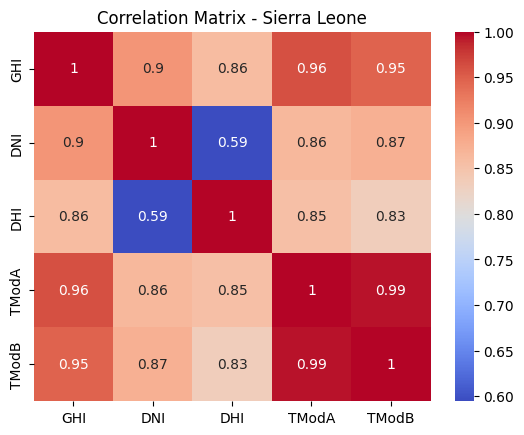

In [16]:
import seaborn as sns

corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
sns.heatmap(df_clean[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Sierra Leone')
plt.show()

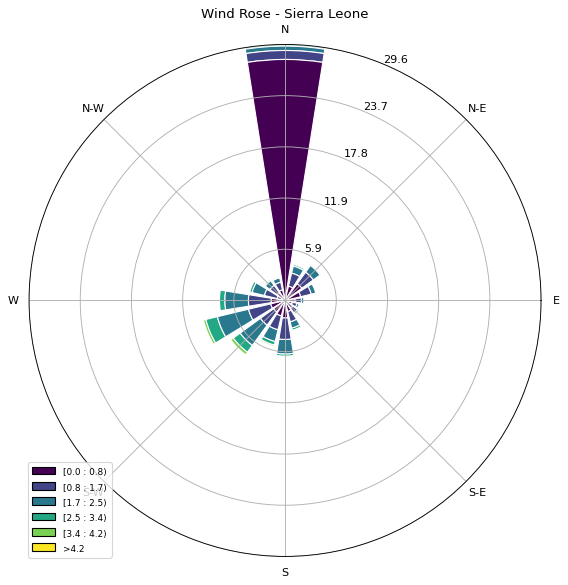

In [17]:
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(df_clean['WD'], df_clean['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title('Wind Rose - Sierra Leone')
plt.show()

In [20]:
df.to_csv('../data/togo_clean.csv', index=False)


In [21]:
import pandas as pd
df = pd.read_csv('../data/togo_clean.csv')
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,10/30/2021 0:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,10/30/2021 0:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,10/30/2021 0:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,10/30/2021 0:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,10/30/2021 0:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [22]:
# Summary stats
df.describe()

# Missing values
df.isna().sum()

# Optional: highlight columns with >5% nulls
nulls = df.isna().mean() * 100
nulls[nulls > 5]

Comments    100.0
dtype: float64

In [23]:
import numpy as np
from scipy import stats

columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Calculate Z-scores
z_scores = np.abs(stats.zscore(df[columns_to_check]))

# Count outliers per column
outliers = (z_scores > 3).sum(axis=0)
outliers

array([  1,   0,  34,   1,   1, 109, 106])

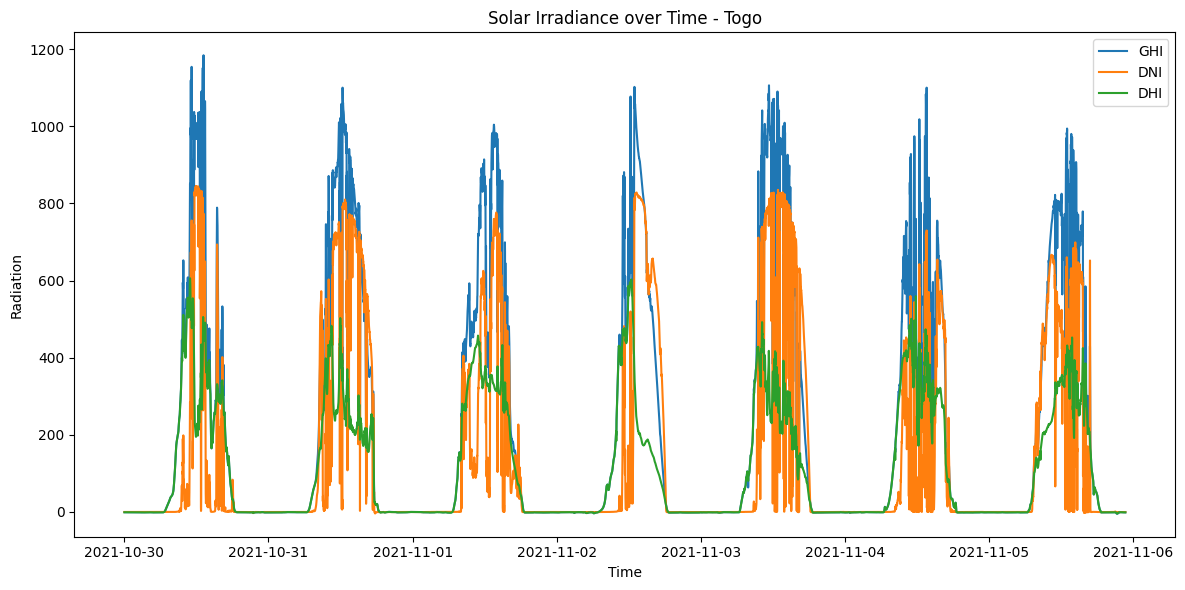

In [24]:
import matplotlib.pyplot as plt

df['Timestamp'] = pd.to_datetime(df['Timestamp'])

plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['GHI'], label='GHI')
plt.plot(df['Timestamp'], df['DNI'], label='DNI')
plt.plot(df['Timestamp'], df['DHI'], label='DHI')
plt.xlabel('Time')
plt.ylabel('Radiation')
plt.title('Solar Irradiance over Time - Togo')
plt.legend()
plt.tight_layout()
plt.show()

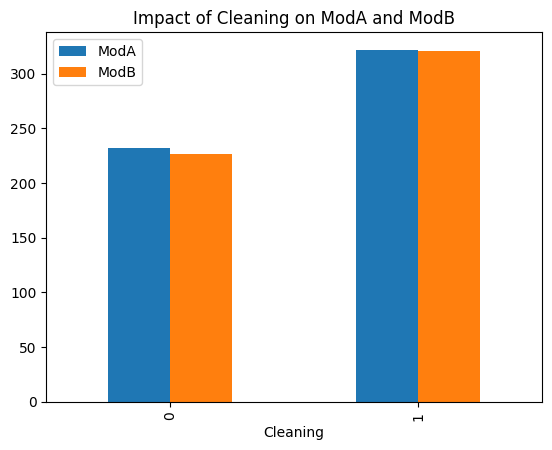

In [25]:
df.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar', title='Impact of Cleaning on ModA and ModB')
plt.show()

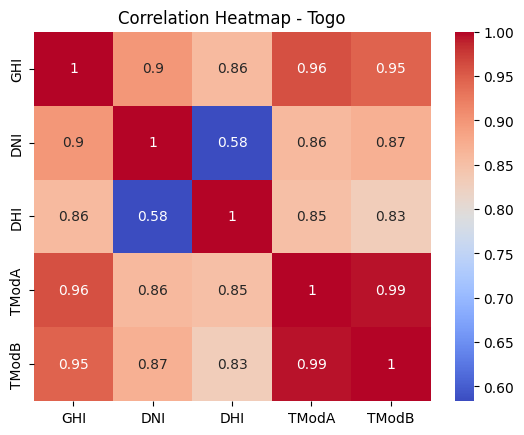

In [26]:
import seaborn as sns
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap - Togo")
plt.show()

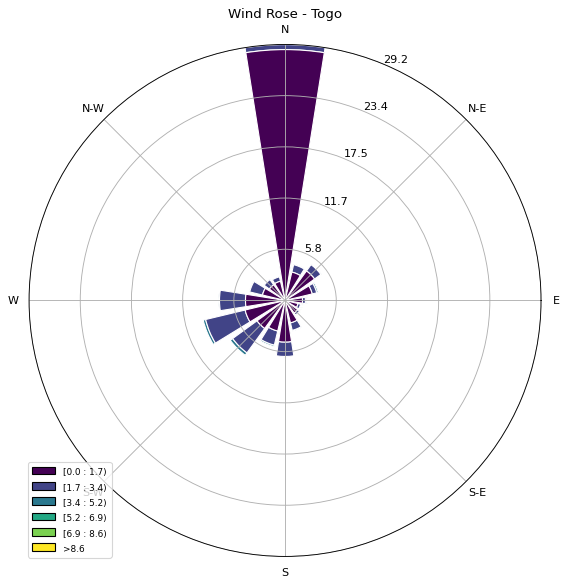

In [27]:
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title('Wind Rose - Togo')
plt.show()

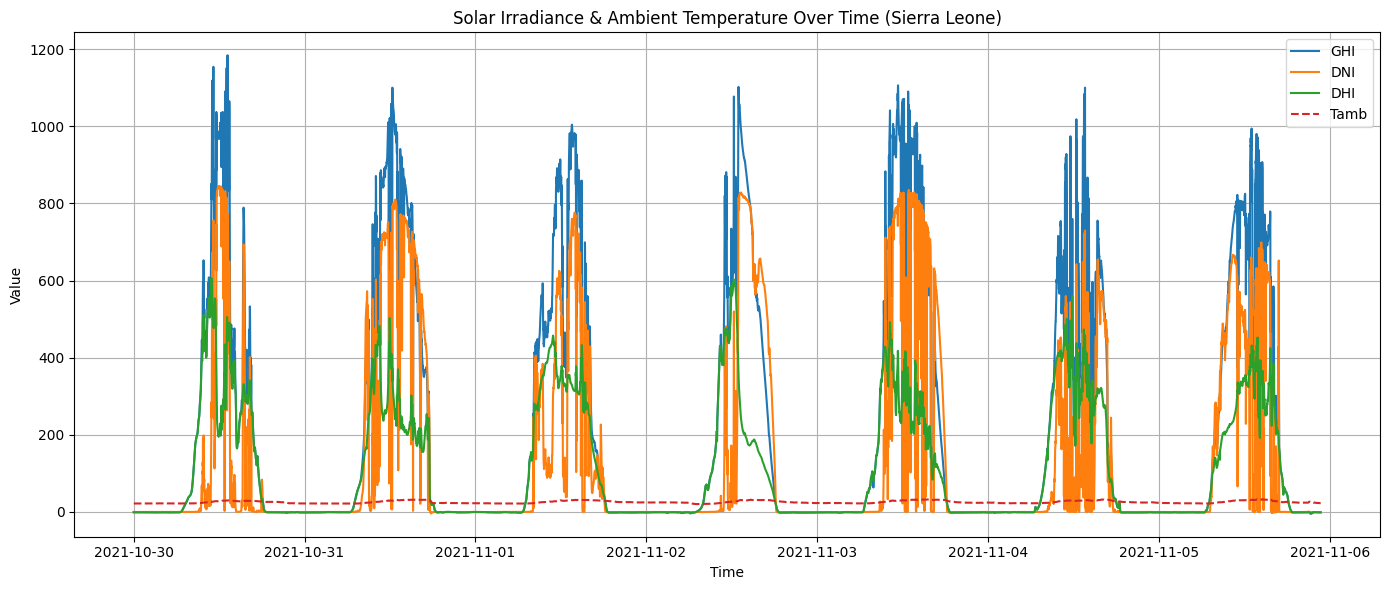

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert Timestamp column to datetime if not already
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Plotting time series
plt.figure(figsize=(14, 6))
plt.plot(df['Timestamp'], df['GHI'], label='GHI')
plt.plot(df['Timestamp'], df['DNI'], label='DNI')
plt.plot(df['Timestamp'], df['DHI'], label='DHI')
plt.plot(df['Timestamp'], df['Tamb'], label='Tamb', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Solar Irradiance & Ambient Temperature Over Time (Sierra Leone)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
df.set_index('Timestamp', inplace=True)
df_resampled = df.resample('D').mean()  # daily average

In [30]:
cleaning_impact = df.groupby('Cleaning')[['ModA', 'ModB']].mean()
cleaning_impact

,ModA,ModB
Cleaning,,
0,232.213452,226.677654
1,321.637500,320.706250


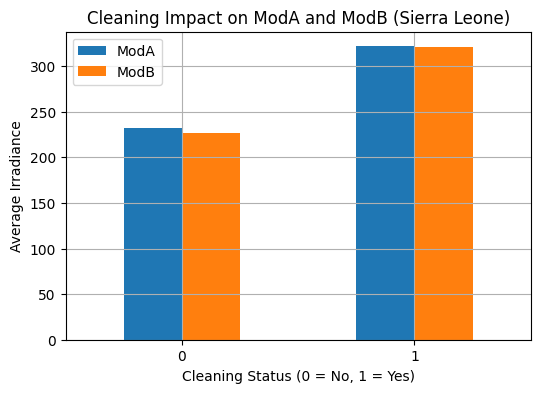

In [31]:
import matplotlib.pyplot as plt

cleaning_impact.plot(kind='bar', figsize=(6, 4))
plt.title('Cleaning Impact on ModA and ModB (Sierra Leone)')
plt.xlabel('Cleaning Status (0 = No, 1 = Yes)')
plt.ylabel('Average Irradiance')
plt.grid(True)
plt.xticks(rotation=0)
plt.show()

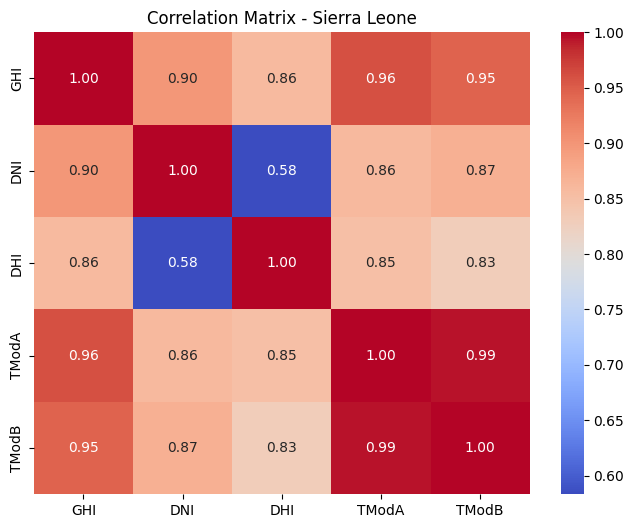

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_matrix = df[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix - Sierra Leone")
plt.show()

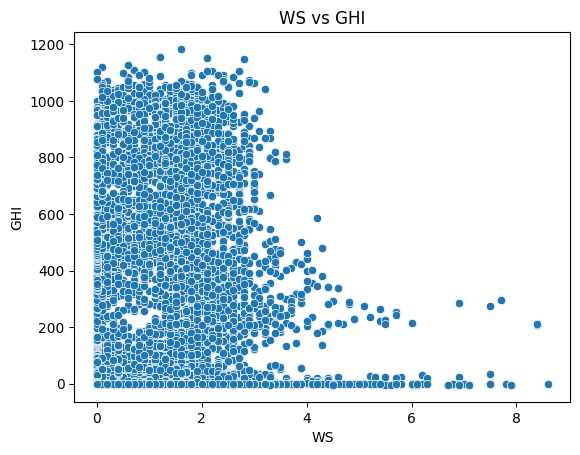

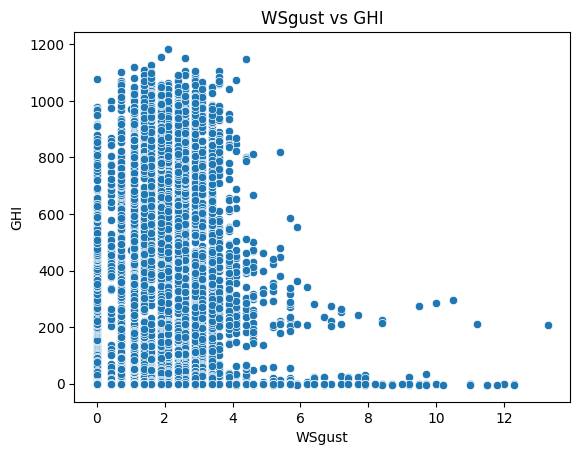

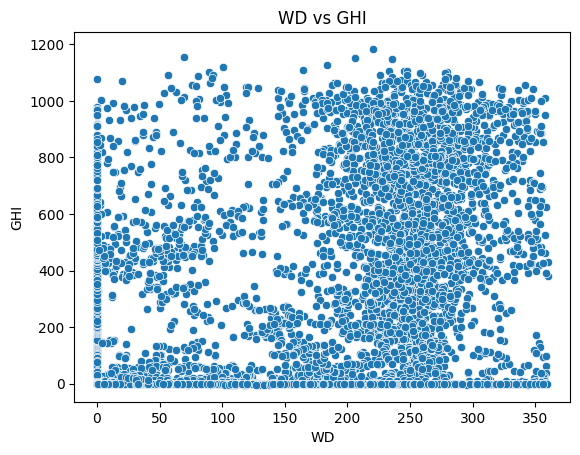

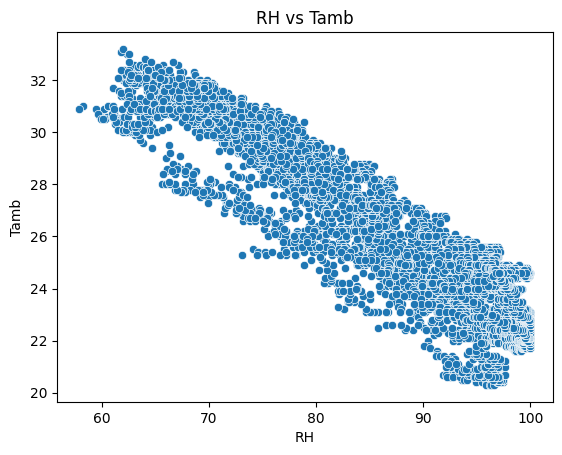

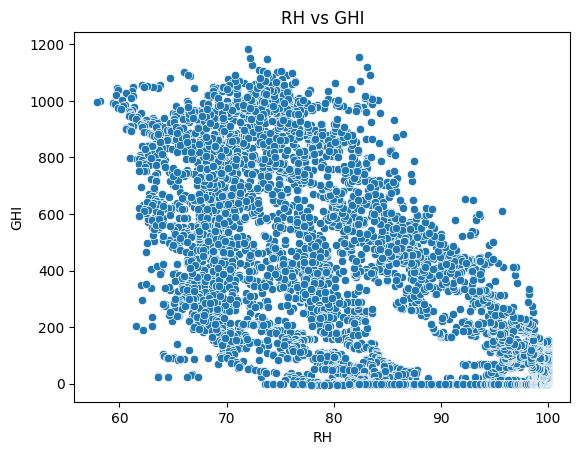

In [33]:
# WS vs GHI
sns.scatterplot(x='WS', y='GHI', data=df)
plt.title("WS vs GHI")
plt.show()

# WSgust vs GHI
sns.scatterplot(x='WSgust', y='GHI', data=df)
plt.title("WSgust vs GHI")
plt.show()

# WD vs GHI
sns.scatterplot(x='WD', y='GHI', data=df)
plt.title("WD vs GHI")
plt.show()

# RH vs Tamb
sns.scatterplot(x='RH', y='Tamb', data=df)
plt.title("RH vs Tamb")
plt.show()

# RH vs GHI
sns.scatterplot(x='RH', y='GHI', data=df)
plt.title("RH vs GHI")
plt.show()

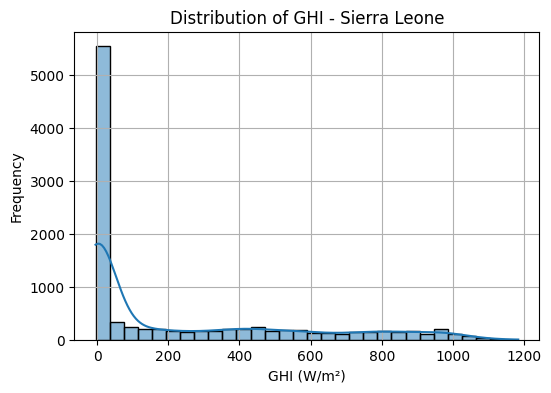

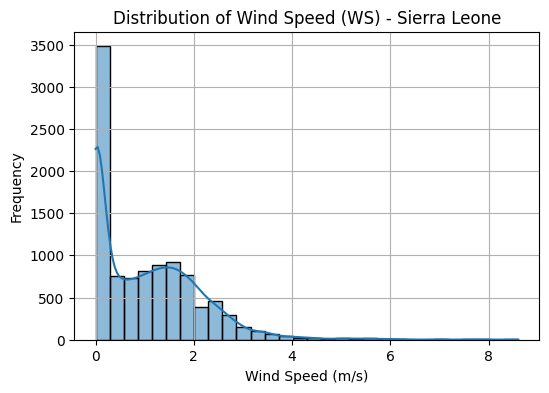

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for GHI
plt.figure(figsize=(6, 4))
sns.histplot(df['GHI'], bins=30, kde=True)
plt.title("Distribution of GHI - Sierra Leone")
plt.xlabel("GHI (W/m²)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Histogram for WS
plt.figure(figsize=(6, 4))
sns.histplot(df['WS'], bins=30, kde=True)
plt.title("Distribution of Wind Speed (WS) - Sierra Leone")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

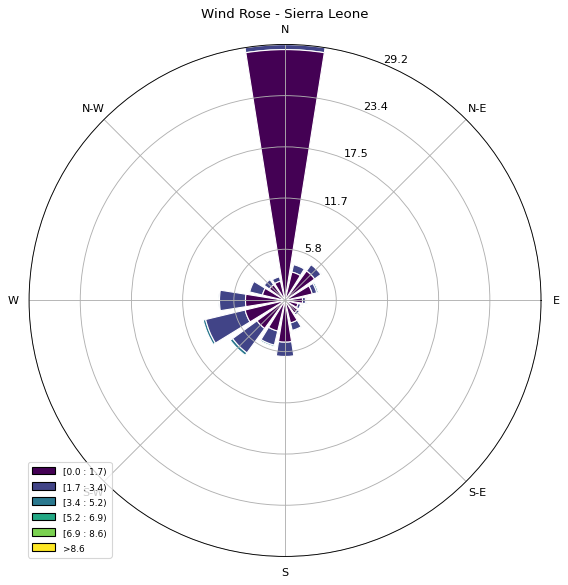

In [35]:
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title("Wind Rose - Sierra Leone")
plt.show()

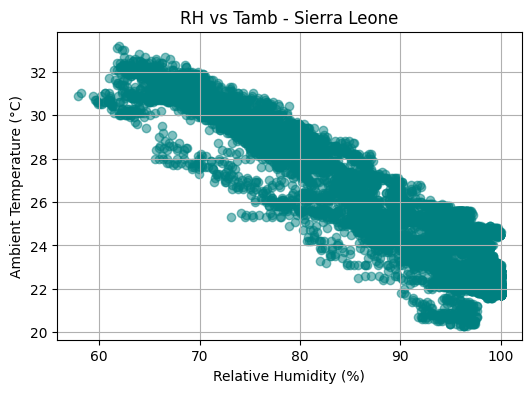

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.scatter(df['RH'], df['Tamb'], alpha=0.5, color='teal')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.title('RH vs Tamb - Sierra Leone')
plt.grid(True)
plt.show()

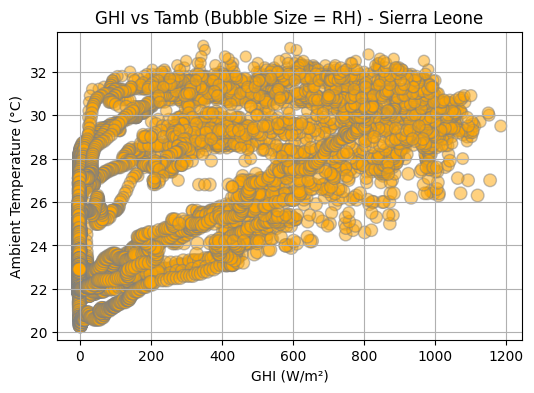

In [37]:
plt.figure(figsize=(6, 4))
plt.scatter(df['GHI'], df['Tamb'], s=df['RH'], alpha=0.5, c='orange', edgecolors='grey')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Ambient Temperature (°C)')
plt.title('GHI vs Tamb (Bubble Size = RH) - Sierra Leone')
plt.grid(True)
plt.show()

In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

from eda_utils import load_data, plot_timeseries

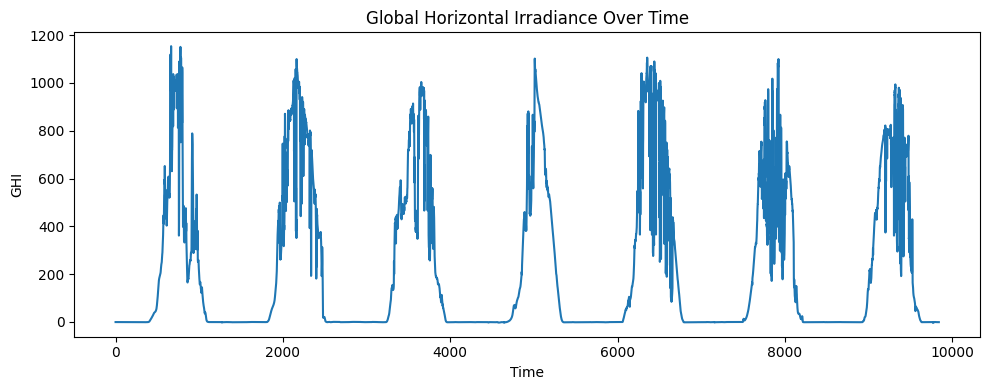

In [2]:
df = load_data('data/sierra_leone_clean.csv')
plot_timeseries(df, 'GHI', 'Global Horizontal Irradiance Over Time')